# REDUCING HOSPITAL READMISSIONS WITH HOSPITAL DATA SET:


# Source of Data
The data set that was gathered was hospital readmissions data for medicare patients and it was obtained from the following government data website: https://catalog.data.gov/datasetq=hospital+readmission&sort=score+desc%2C+name+asc&page=1  Here is a link with a copy of that data after removing patient and location id numbers:https://www.dropbox.com/sh/i7jcc1w9657s5q7/AAA13e0frUczLXEmxhZ6tMPRa?dl=0 
Please save the csv file from the above link in the same directory on your computer that you are running the Hospital_Readmissions_Data_Capstone jupyter notebook file so that the notebook can find the file when running the cells. You will also see in the above link a copy of the Tableau file that was used to generate some of the graphs below.

## Data Description
The initial data set contained unidentifiable encounter ids, unidentifiable patient ids, patient race, patient age, patient age range, patient admission codes, patient discharge codes, patient admission source, number of lab 
procedures performed on patient while in hospital, number of procedures performed on the patient while in the hospital, 
number of medications given while patient in hospital, patient glucose, patient A1C levels, prescibed drugs being taken
before being admitted, whether the patient had diabetes, and whether the patient was readmitted to the hospital.  The data
is useful because it has multiple variables that may influence the total time that the patient spends in the hospital and may influence the probability that the patient may be readmitted to the hospital. Our initial exploration of the data 
decided to focus on four data sets to ask three analytical questions for initial exploration of the data. The data set was cleaned to focus on the four data sets of interest. 

## Three Questions To Answer In Data Set
• Are there any common trends among the four data factors?

• Is there any clustering or outliers of the four data factors:  
    1. Time In Hospital
    2. Number of Lab Procedures Performed at Hospital
    3. Number of Procedures Performed at Hospital
    4. Number of Medications Administered at Hospital

• What is the median, mean, and standard deviation of the data factors so that we       may have a better understanding of the variance of the data factors and what       is the likelihood that are findings in initial exploration of data are due         to chance? 
  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import scipy

In [4]:
hospital_readmit = pd.read_csv('HospitalReAdmissions_1.csv')  
df = hospital_readmit
   

# Initial Data Description

## • Time in Hospital:  
Patients in the data set spent a mean 4.395 days in the hospital.  The standard deviation for time in hospital was 2.985.  They stayed a minimum of one day and a maximum of 14 days in the hospital.  I will look at trends to see if any of the other variables below correlated with the time in the hospital. 

## •Number of Lab Procedures:  
Patients had a mean of 43.095 lab procedures performed during their hospital stay. The standard deviation for lab procedures was 19.674.   Each patient had at least one lab procedure done and a maximum of 132 lab procedures performed. 

## •Number of Procedures:  
Patients had a mean of 1.339 procedures performed during their hospital stay.  The standard deviation for procedures performed during hospital stay was 1.705.  Patients may have had no procedures performed or a maximum of six procedures performed during their hospital stay.  

## • Number of Medications:  
Patients were administered a mean of 16.021 medications.  The standard deviation of medications administered was 8.127.  Patients were administered at least one medication and a maximum of 81 medications during their hospital stay.

## Would Like Answers to Data Specifics:
The data set provided included 101766 patients.  So there were 101766 rows of data for each of the variables described above.  The data provided was provided to the general public and as such it lacked the specifics that I would have liked to have seen if I were working with a specific hospital. 

For example, we would want to know exactly how a lab procedure is defined: is it each time that a procedure was performed or if for example a patient had blood drawn and multiple tests performed on that single draw of blood would that count as multiple lab procedures?  Also looking at the number of medications, the data set did not specify if an entry for medication administered was for a repeat dose of the same medication or each entry represented a unique medication.  As such, the analysis that follows is more of an exploration of data that one may see in a hospital with medicaid patients and provides insight as to which data sets and relationships you may want to explore more closely at a specific hospital. 

In [5]:
hospital_readmit.describe()     ###An initial look at size, mean, standard deviation, and range of data
                                ###Will explore this further below in plots and will refer to it below.

,time_in_hospital,num_lab_procedures,num_procedures,num_medications
count,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844
std,2.985108,19.674362,1.705807,8.127566
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000
50%,4.000000,44.000000,1.000000,15.000000
75%,6.000000,57.000000,2.000000,20.000000
max,14.000000,132.000000,6.000000,81.000000


In [6]:
hospital_readmit.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'diabetesMed', 'readmitted'],
      dtype='object')

![](C:\Users\Trader\Documents\ThinkfulCourse\OngoingJupyterWork\Prep_Cap_Stone\Time_Out_Of_Hospital.png)

# Trends of Number of Procedures, Number  of Medications, and Number of Procedures against Time in Hospital:

I took aggregate data and median data for each of the three variables above and plotted these variables in Tableau with a trend line with 95% confidence intervals.  All of the variables showed a positive correlation between the variable and time in hospital.  Number of procedures and number of medications showed the steeper slope on the trend line such that as the number of medications increased or the number of procedures increase, then the hospital stay in days increased. 

<img src="Time_Out_Of_Hospital.png" width="400" height="310" alt=""/>

<img src="Trends.png" width="500" height="250" alt=""/>

# Trend of Number of Medications and Hospital Stay

Again, I used Tableau to generate a bar graph below. The x axis on both bar graphs represents the Time in Hospital.  The data shows that patients that are staying in the hospital for longer than three days, that those patients are clearly being administered greater numbers of medications. 

<img src="Correlation_Meds_Hosp_Stay.png" width="400" height="250" alt=""/>

# Clusters of Number of Procedures VS Time in Hospital
The data below is plotted in a 2 dimensional histogram with the distinct data point centered on the integer value of the data point.  Higher frequency of a data point is in yellow and lower frequency of data point is in dark blue. You can see that the data is clustered where most patients were in the hospital for eight or fewer days that had a total of three or less procedures.  The majority of patients (in yellow) were in the hospital for three days and had one procedure done.  There also appears to be a group of patients that had six procedures done but were in the hospital for only one day. 

(array([[ 0.04178612,  0.02228109,  0.01966832,  0.00965272,  0.00867293,
          0.0158399 ],
        [ 0.05744457,  0.02926661,  0.02420438,  0.00860036,  0.00615089,
          0.01063251],
        [ 0.0714519 ,  0.03683275,  0.02643611,  0.00921726,  0.00658635,
          0.00885437],
        [ 0.05724498,  0.03189752,  0.02126501,  0.00863664,  0.00609645,
          0.00816489],
        [ 0.04084262,  0.02467613,  0.01703741,  0.00727583,  0.00544326,
          0.00680408],
        [ 0.02917589,  0.0205211 ,  0.01429764,  0.0068948 ,  0.00437275,
          0.00667707],
        [ 0.02447654,  0.01734586,  0.01170302,  0.00555213,  0.00379214,
          0.00620532],
        [ 0.01721886,  0.01375331,  0.00985231,  0.00497151,  0.00375585,
          0.00584244],
        [ 0.01088653,  0.00952571,  0.00703995,  0.0036107 ,  0.00246761,
          0.00491708],
        [ 0.00816489,  0.00727583,  0.00546141,  0.00304823,  0.00235875,
          0.00426389],
        [ 0.00576986,  0.00602

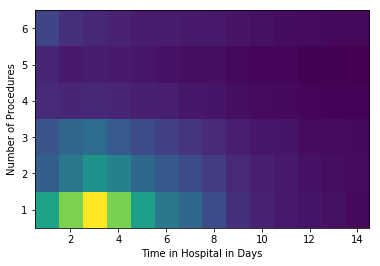

In [7]:
x=hospital_readmit['time_in_hospital']
y=hospital_readmit['num_procedures']
plt.xlabel('Time in Hospital in Days')
plt.ylabel('Number of Procedures')
plt.hist2d(x, y, bins=(14, 6), range=([.5,14.5],[.5, 6.5]), normed=True, weights=None,)

# Clusters of Number of Lab Procedures VS Time in Hospital:
The data below is plotted in a 2 dimensional histogram with the distinct data point centered on the integer value of the data point.  Higher frequency of a data point is in yellow and lower frequency of data point is in dark blue. Looking at the variable of number of lab procedures it appears that most patients had a hospital stay of two days and less than three lab procedures.  Interestingly there also appears to be a group of data that had between 35 and 60 lab procedures done while their hospital stay was less than six days.  So although there was a trend from our line graph above that showed as number of lab procedures increased the hospital stay increased there is also a significant number of patients that are having 35 to 60 lab procedures done but still being dismissed from the hospital in less than six days.  It would be worth exploring any other dependent variables that may be preventing patients that are having 35 to 60 lab procedures performed from staying in the hospital for an extended stay of six to 14 days.

(array([[  8.81470778e-03,   3.30860180e-03,   2.82712616e-03,
           1.77775619e-03,   1.01233339e-03,   1.24689844e-03,
           9.13569153e-04,   1.39504479e-03,   2.65428876e-03,
           3.18514651e-03,   2.34565053e-03,   1.91355701e-03,
           1.19751632e-03,   9.87642328e-04,   1.19751632e-03,
           1.43208138e-03,   1.98763018e-03,   1.99997571e-03,
           3.66662214e-03,   2.14812206e-03,   1.91355701e-03,
           1.67899196e-03,   1.87652042e-03,   1.53084561e-03,
           2.20984971e-03,   3.18514651e-03,   2.17281312e-03,
           2.71601640e-03,   4.71599212e-03,   3.40736603e-03,
           0.00000000e+00,   3.38267497e-03,   3.71600426e-03,
           2.98761804e-03,   4.60488235e-03,   4.82710188e-03,
           4.91352058e-03,   4.70364659e-03,   4.58019129e-03,
           4.40735389e-03,   3.54316685e-03,   3.66662214e-03,
           3.85180508e-03,   4.99993928e-03,   4.55550024e-03,
           3.19749204e-03,   3.99995143e-03,   2.913544

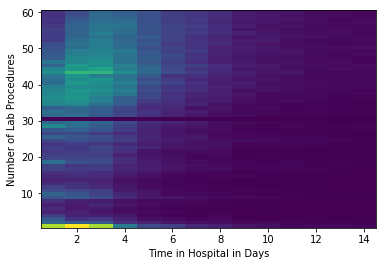

In [8]:
a=hospital_readmit['time_in_hospital']
b=hospital_readmit['num_lab_procedures']
plt.xlabel('Time in Hospital in Days')
plt.ylabel('Number of Lab Procedures')
plt.hist2d(a, b, bins=(14, 61), range=([.5,14.5],[.5, 60.5]), normed=True, weights=None,)

# Clusters of Number of Medications VS Time in Hospital:
The data below is plotted in a 2 dimensional histogram with the distinct data point centered on the integer value of the data point.  Higher frequency of a data point is in yellow and lower frequency of data point is in dark blue. This data set mirrors what I saw in the trend line for the same data set when we plotted it in Tableau above.  In the plot below, most patients were in the hospital between one and four days.  It also appears that as the number of medications increased that there was also a correlation with some but not all patients that were extending their stay in the hospital.  Again, I would want to discuss with hospital staff what dependent variables may be accounting for why some patients are only in the hospital for two to four days but other patients on the same number of medications are in the hospital for a longer period of time.  

(array([[  1.42996718e-03,   2.32994653e-03,   4.01990774e-03,
           5.65987010e-03,   7.46982856e-03,   8.37980768e-03,
           9.50978174e-03,   1.08397512e-02,   1.14597370e-02,
           1.07997521e-02,   1.02797641e-02,   9.60977945e-03,
           9.11979069e-03,   6.95984027e-03,   6.57984899e-03,
           5.55987240e-03,   4.71989167e-03,   3.53991876e-03,
           3.15992748e-03,   2.28994744e-03,   1.87995685e-03,
           1.66996167e-03,   1.21997200e-03,   8.19981181e-04,
           6.79984394e-04,   4.49989672e-04,   4.09990590e-04,
           3.19992656e-04,   2.79993574e-04,   1.39996787e-04,
           0.00000000e+00,   9.99977050e-05,   9.99977050e-05,
           1.09997475e-04,   4.99988525e-05,   2.99993115e-05,
           9.99977050e-06,   2.99993115e-05,   9.99977050e-06,
           9.99977050e-06,   1.99995410e-05,   9.99977050e-06,
           9.99977050e-06,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.000000

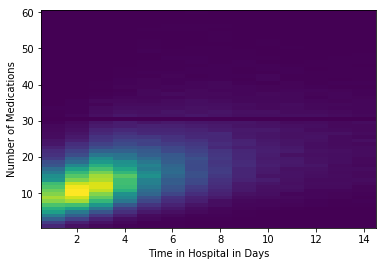

In [9]:
c=hospital_readmit['time_in_hospital']
d=hospital_readmit['num_medications']
plt.xlabel('Time in Hospital in Days')
plt.ylabel('Number of Medications')
plt.hist2d(c, d, bins=(14, 61), range=([.5,14.5],[.5, 60.5]), normed=True, weights=None,)

# Looking for Outliers:
In the box plots below, I utilized the plotting capabilities in Tableu to look at where the median data points were for each variable and where in the different quartiles the data was located, and the outer extent of data points for each of the variables.  

## Number of Medications:  
Here, the majority of patients, the Q1 to Q3 range, were between about 15 and 22 medications. There was a group of patients that had  25 medications, and in Tableau, it showed that these patients had a hospital stay of 14 days. So althought the data is clustering between 15 and 22 as the number of medications, there are patients that have a higher number of medications and these patients are having longer hospital stays.  Please see the attached Tableau file for the details on this data.

## Number of Procedures:
Here there is more clustering of the data and it looks like most patients had between one and two procedures performed during their hospital stay. Although, those patients that had two procedures, Tableu, showed that their hospital stay was more than double the hospital stay of those patients that had one procedure.  Please see the attached Tableau file. 

## Number of Lab Procedures:
Here the majority of patients had between 45 and 57 lab procedures completed.  On the lower end of the box plot or the "wisker" patients with the shortest hospital stay of one to three days had between 35 and 42 lab procedures as opposed to patients at the other end of the box plot who had 51 to 57 lab procedures had hospital stays of seven to 12 days.  Here I would want to talk with hospital directors to explore dependent variables that could influence the number of lab procedures being done for the patient.  Are lab procedures being ordered with a corresponding diagnostic code and associated with an ordering provider? 

<img src="Box_Plot_Hospital_Data.png" width="250" height="170" alt=""/>

# Histogram: "Number of Lab Procedures Performed." 
Here the data has a normalized pattern that is clustered around the mean. The mean appears relativle close to the data center cluster.   The data has a moderate variance and although normalized it does appear slightly skewed toward 0-20 lab procedures performed while at the hospital.
Lastly the standard deviation is within about one half the value of the mean which again supports a moderate distribution
of the data set. 

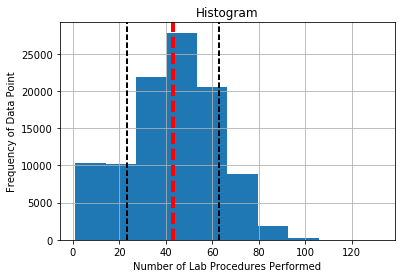

In [10]:
hospital_readmit['num_lab_procedures'].hist()
plt.axvline(hospital_readmit['num_lab_procedures'].mean(), color='r', linestyle = 'dashed', linewidth = 4)
plt.axvline(hospital_readmit['num_lab_procedures'].mean() + hospital_readmit['num_lab_procedures'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.axvline(hospital_readmit['num_lab_procedures'].mean() - hospital_readmit['num_lab_procedures'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.title("Histogram")
plt.xlabel('Number of Lab Procedures Performed')
plt.ylabel('Frequency of Data Point')
plt.show()

# Histogram: "Time in Hospital, In Days." 
Here the data does not appear normalized.  The data
is somewhat clustered around the mean but definately skewed toward less than six days in the hospital.  The mean is 
informative but not as informative as in a normalized data distribution.  Also, visually here the standard deviation 
appears almost as large as the mean itself which indicates a broader distribution of the data compared to our last data
set. Here, I may want to pull a data set that is clustered around 1 to 3 days in the hospital to see if there are any 
trends there.  Lastly, this data set has a wider variance as compared to our last data set. Decay does not have a normalized data distribution. This is where I would look at exponential or log based functions with a time element. 

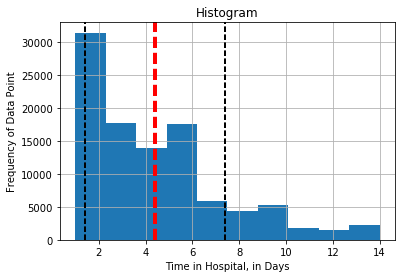

In [11]:
hospital_readmit['time_in_hospital'].hist()
plt.axvline(hospital_readmit['time_in_hospital'].mean(), color='r', linestyle = 'dashed', linewidth = 4)
plt.axvline(hospital_readmit['time_in_hospital'].mean() + hospital_readmit['time_in_hospital'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.axvline(hospital_readmit['time_in_hospital'].mean() - hospital_readmit['time_in_hospital'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.title("Histogram")
plt.xlabel('Time in Hospital, in Days')
plt.ylabel('Frequency of Data Point')
plt.show()

# Histogram: "Number of Procedures Performed" 
Here the mean is not centered in the cluster of data 
performed.  Visually, the standard deviation also appears to be larger than the mean value.  Both of these representations 
of the mean and standard deviation indicate that the mean is not a measure of central tendence and the standard deviation
here may not describe the variance as accurately as a normalized data distribution.  The data here appears skewed toward
no procedures being performed and for patients that had a procedure performed, many patients had only one procedure 
performed.  There also appears to be a moderate variance in the data as well.  

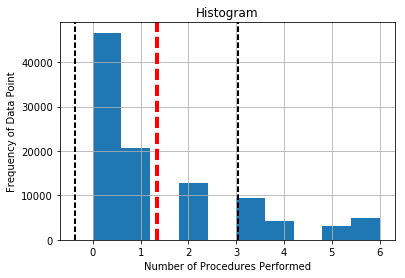

In [12]:
hospital_readmit['num_procedures'].hist()
plt.axvline(hospital_readmit['num_procedures'].mean(), color='r', linestyle = 'dashed', linewidth = 4)
plt.axvline(hospital_readmit['num_procedures'].mean() + hospital_readmit['num_procedures'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.axvline(hospital_readmit['num_procedures'].mean() - hospital_readmit['num_procedures'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.title("Histogram")
plt.xlabel('Number of Procedures Performed')
plt.ylabel('Frequency of Data Point')
plt.show()

# Histogram: "Number of Medications"
In our last histogram, I looked at "Number of Medications Administered."  Here the bulk of the data does appear around 
the mean with a centralized tendency.  The data has a normalized appearance with a peak of around 10-16 medications
administered.  The data does taper off considerably as the number of medications is increased. Visually, the standard 
deviation and clustering of the data indicates  data with a lower variance.  Here we may find this data more meaningful
in exploring how number of medications administered correlated with length of hospital stay or days in hospital.  For 
further study it would be good to also see how this variable, "number of medicatons administered"  correlates to 
hospital readmission rates.  Seeing as how clustered the data was around the mean, I was curious what percent of the data
was indeed within +- one standard deviation of the mean, so I calculated that value with a for loop below.  Use a built-in function vs a loop where possible for better speed and performance to bring faster math calculations. 

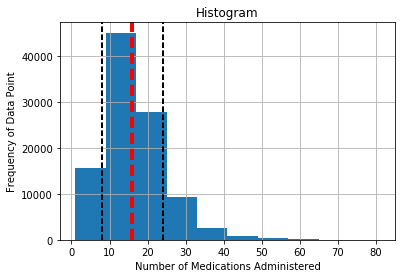

In [13]:
hospital_readmit['num_medications'].hist()
plt.axvline(hospital_readmit['num_medications'].mean(), color='r', linestyle = 'dashed', linewidth = 4)
plt.axvline(hospital_readmit['num_medications'].mean() + hospital_readmit['num_medications'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.axvline(hospital_readmit['num_medications'].mean() - hospital_readmit['num_medications'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.title("Histogram")
plt.xlabel('Number of Medications Administered')
plt.ylabel('Frequency of Data Point')
plt.show()

# Calculating % Of Number of Medications Clustered Around the Mean From Histogram Above:
In the for loop below, I wanted to iterate through each data element and see if that value fell within plus or minus one
standard deviation of the mean.  I wanted an exact number of data that fell within this normalized pattern.  We know 
that if 68% of data is within plus or minus the data is normalized, but I wanted to know exactly how normalized and 
quantify that value.  Our loop gives us a value of about 76% of the data falling within plus or minus one standard 
deviation of the mean, which confirms a clustered data set centered on the mean in a normalized distribution.  

In [14]:
### utilizing counter to calculate percent of variables within standard deviation 
counter_outside_stand_dev_med_count = 0; 
counter_med_count = 0;                    

In [15]:
###loop tests if data within standard deviation
for ea_med_count in hospital_readmit['num_medications']: 
    if ea_med_count <= hospital_readmit['num_medications'].mean() + hospital_readmit['num_medications'].std() and ea_med_count >= hospital_readmit['num_medications'].mean() - hospital_readmit['num_medications'].std():
        counter_med_count += +1                            
    else:                                                   
        ###if data within standard deviation then increasing our counter
        counter_med_count = counter_med_count


In [16]:
total_items = len(hospital_readmit['num_medications'])
percent_in_stand_deviation = counter_med_count / total_items     
percent_in_stand_deviation 
### This number is the percent of our data that is within +-1 standard deviation
###  of the mean

0.7592909223119706

# 76% = Number of Medications Data within +-1 Standard Deviation of Mean

# Checking The Data Integrity After Calculations:
In the table below, I wanted to query the data set after performing all of these operations on the data set and just 
check that I haven't changed the data.  Comparing this query to the one performed at the beginning of the notebook, we
can see that the data remains unchanged after our plotting and statistical calculations.  Risk of changing data is pretty low.  

In [17]:
### verifying integrity of our data set after all of our calculations and compares to initial
### queery of our data set at the begining
hospital_readmit.describe()  

,time_in_hospital,num_lab_procedures,num_procedures,num_medications
count,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844
std,2.985108,19.674362,1.705807,8.127566
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000
50%,4.000000,44.000000,1.000000,15.000000
75%,6.000000,57.000000,2.000000,20.000000
max,14.000000,132.000000,6.000000,81.000000


# Subset of Patients: At Least One Procedure Done:
From the discussion above, I decide to break out a subset of patients from the larger data set to include patients that 
had at least one procedure done. Here, I was hoping to see a pattern develop and perhaps a normalized distribution of 
data within the sub population. Initially, I tried to filter the data by creating a new dataframe and then creating a 
loop.  Within the loop, I was going to add the patient to the new sample data if they had had a procedure done.  There 
were two problems with that approach:  firstly pandas did not like me creating the dataframe within the loop, as each 
time the loop iterated a new dataframe was created (slow and not good), secondly even if I created the new dataframe outside of the loop, but then tried to add rows to the new dataframe I ran into errors and slow processing, and thirdly the loop was just plain slow in general in the amount of time it took the kernel to iterate through the data.  The solution that I settled on below was a built in filter within pandas that executed the operation much faster and without errors.  So, I created my new data sets below:

In [18]:
sample_had_procedure = hospital_readmit[hospital_readmit['num_procedures'] > 0]   ###Pulling data:patients with > 0 procedures
sample_not_have_procedure = hospital_readmit[hospital_readmit['num_procedures'] < 1]###Patients no procedures performed

# What Changed in Patients That Had At Least One Procedure Done?:
In our new sample of patients that had at least one procedure done, we can see that it did shift the mean number of 
procedures performed from 1.339730 to 2.473763.  Also the mean time in hospital shifted from 4.395987 to 4.909823. Also
the standard deviation for number of procedures performed shifted from 1.339730 to 2.473763 and the standard deviation
for time in hospital shifted from 2.985108 to 3.193537.  So in our subset we see a greater variance than in the original
population.  Lets look at some plots below to get some more insight.

In [19]:
sample_had_procedure.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications
count,55114.000000,55114.000000,55114.000000,55114.000000
mean,4.909823,43.239848,2.473763,18.491672
std,3.193537,20.202428,1.602330,8.939283
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,31.000000,1.000000,12.000000
50%,4.000000,44.000000,2.000000,17.000000
75%,7.000000,57.000000,3.000000,23.000000
max,14.000000,132.000000,6.000000,81.000000


# Histogram of Patients That Had At Least One Procedure Done
The histogram shows a non normalized distribution of data or number of procedures.  Here the data is not clustered around the mean, there is a rather broad variance with the standard 
deviation plus or minus the mean being rather broad.  Here the mean is not a measure of central tendency and the standard
deviation tells us less information than in a normalized plot.  There does appear to be a trend though with the data being
skewed toward the fact that most patients only had one procedure done while at the hospital. 

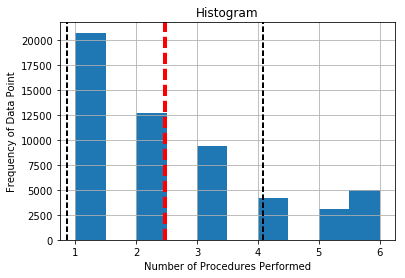

In [20]:
sample_had_procedure['num_procedures'].hist()
plt.axvline(sample_had_procedure['num_procedures'].mean(), color='r', linestyle = 'dashed', linewidth = 4)
plt.axvline(sample_had_procedure['num_procedures'].mean() + sample_had_procedure['num_procedures'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.axvline(sample_had_procedure['num_procedures'].mean() - sample_had_procedure['num_procedures'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.title("Histogram")
plt.xlabel('Number of Procedures Performed')
plt.ylabel('Frequency of Data Point')
plt.show()###sub data set of patients that had at least one procedure

# Histogram of Patients That Had At Least One Procedure and Time In Hospital:
Here the data is not normalized but the mean is closer to the center of the cluster of data.  The standard deviation 
shows a rather broad variance in the data with the data being skewed toward a lower amount of time spent in the hospital.
Although the data is skewed and not normalized the mean was a slightly better measure of central tendency than our original
data set.  I decided to calculate the difference in the means between sample population and the original population for 
the variable 'time in hospital' and then further calculate a t test and p value for the data sets and interpret the 
meaning.


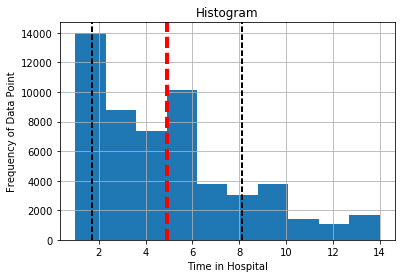

In [21]:
sample_had_procedure['time_in_hospital'].hist()
plt.axvline(sample_had_procedure['time_in_hospital'].mean(), color='r', linestyle = 'dashed', linewidth = 4)
plt.axvline(sample_had_procedure['time_in_hospital'].mean() + sample_had_procedure['time_in_hospital'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.axvline(sample_had_procedure['time_in_hospital'].mean() - sample_had_procedure['time_in_hospital'].std(), color='k', linestyle = 'dashed', linewidth = 2)
plt.title("Histogram")
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency of Data Point')

In [22]:
###calculating the difference in mean values here between sample and main group
diff_in_means = sample_had_procedure['time_in_hospital'].mean() - hospital_readmit['time_in_hospital'].mean()
print(diff_in_means)

0.5138364035495737


In [23]:
###calculating sum of standard deviations
sum_stds = sample_had_procedure['time_in_hospital'].std()**2 + hospital_readmit['time_in_hospital'].std() ** 2
print(sum_stds)                      

19.109547854295094


In [24]:
###need this value to calculate my t value
sum_size = len(sample_had_procedure['time_in_hospital']) + len(hospital_readmit['time_in_hospital'])
print(sum_size)                     

156880


In [25]:
###calculating the standard error
stand_error = (sum_stds/sum_size) **0.5
print(stand_error)                              

0.011036755341793122


In [26]:
t_value_sample_procedures = diff_in_means/stand_error
print(t_value_sample_procedures)

46.55683555870974


# Resulting T Value Time In Hospital:
The t value of 46.55683555870974 above was a little higher than I expected.  This would indicate a difference in the means in relationship to the variance and standard deviation.  So, it may be worth exploring further the number of procedures 
performed as it correlates to the time in the hospital. This is where I would look at exponential or log based functions with a time element. 

In [27]:
###importing from scipy to allow calculation of p value below
from scipy.stats import t   

In [28]:
###Calculating the p value
p_value_sample = t.sf(t_value_sample_procedures, 1)
print(p_value_sample)

0.00683596608029


### The p value of .68% 
The p value shows that there is a .68% chance that the difference in mean values that we saw in time in hospital for patients that had at least one procedure performed was due to random occurence or chance.  So this variable may indeed be worth a second look.

# Proposal For Further Investigation:

In conclusion, the two variables: number of medications and number of lab procedures performed showed the most normalized
data distributions.  The number of medications had the tightest cluster of data with the most normalized distribution of 
data at 76% of values within plus or minus one standard deviation of the mean. The number of medications also had the highest correlation with increased hospital stay in the trend lines, 2 dimensional histogram, and box plots.  I would ask if the number of medications
increased the probability of an increased hospital stay and increased the likelihood of readmission to the hospital. I would start with a t test and p value for the number of medications variable and then use more advanced statistical analysis to calculate  probability values for normalized data sets. What would be the probability for a longer hospital stay and the probability for readmission to the hospital knowing a certain number of medications were given during the hospital stay? 

My second question would look at the number of lab procedures performed and again if it increased the hospital stay and increased the likelihood of readmission to the hospital.  I would utilize more advanced statistical probability techniques for normalized data to make more accurate predictions, measure correlation to a high degree, and make recommendations to management on how they might improve their systems and processes to obtain better
patient outcomes: reduced hospital stays and reduced patient readmissions.

Thirdly, I would want to utilize statistical methods that could analyze non normalized data sets with a time decay element that could help predict outcomes even in non normalized data like in our example presented with the variables that showed non normalized data and decay with time and how it related to the time in the hospital and hospital readmission rates.  

Lastly, I would involve hospital leadership to obtain specific dependent variables that may be related to especially the number of medications and the number of lab procedures during a hospital stay.  I would also find out which data and details surrounding that data related to those dependent variables is accessible currently and trackable on a per patient and hourly basis. 